LAB 3: Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
#Load in the data
#The data is a csv file of houses on the market. Variables include selling price,
#list price, living, rooms, beds, bath, age of house, land, and taxes

url = "https://people.sc.fsu.edu/~jburkardt/data/csv/homes.csv"
names = ['Sell', 'List', 'Living', 'Rooms', 'Beds', 'Baths', 'Age', 'Acres', 'Taxes']
myData = pd.read_csv(url, header= 0, names=names, dtype = np.float64)
myData = myData.drop(labels = 0, axis=0)

In [4]:
myData.head()
#x = myData.data[:, :2]
#y = myData.target
myData.shape
#print myData

(49, 9)

In [5]:
#The features are everything except Sell
#The sell column is our target variable
X = myData.drop(["Sell"], axis = 1)
y = myData.Sell
X.shape

(49, 8)

In [6]:
# we can split the data using an sklearn function which does everything for us
test_percent = 0.3 # why am I using .3 here?

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_percent)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34, 8), (15, 8), (34,), (15,))

In [7]:
test_percent = .33
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=test_percent)
X_test.shape, y_test.shape

((5, 8), (5,))

In [8]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

data_prediction_validate = regr.predict(X_validation)

rmse = np.sqrt(mean_squared_error(y_validation, data_prediction_validate))
r2 = regr.score(X_validation, y_validation)
print data_prediction_validate
print regr.coef_
print("Root mean squared error: " + str(rmse))
print("R2: " + str(r2))
#print('Coefficients: ', regr.coef_)
#print("Mean squared error: %.2f"
     # % mean_squared_error(y_test, data_prediction))

[ 112.7133342   153.63268297  599.06606452  166.26974215  161.91688576
  233.83290248  139.18157415  109.24599739  175.15165125  133.87621514]
[  9.87439945e-01   6.27985678e-02  -2.76676313e+00   4.28659382e+00
   2.85812792e-01  -1.98194663e-02  -7.71379520e-01  -1.20193019e-03]
Root mean squared error: 11.2711843066
R2: 0.992327155357


In [9]:
print X_test
print y_test

     List  Living  Rooms  Beds  Baths   Age  Acres   Taxes
27  145.0    18.0    7.0   4.0    1.0  35.0   0.43  3363.0
2   132.0    13.0    6.0   3.0    1.0  41.0   0.33  1471.0
20  190.0    24.0    9.0   4.0    2.0  10.0   1.55  4681.0
7   225.0    22.0    8.0   4.0    2.0  16.0   2.22  5158.0
24  190.0    21.0    9.0   5.0    2.0  27.0   1.30  4162.0
27    135.0
2     129.0
20    180.0
7     207.0
24    184.0
Name: Sell, dtype: float64


In [10]:
data_prediction_test = regr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, data_prediction_test))
r2 = regr.score(X_test, y_test)
print data_prediction_test
print regr.coef_
print("Root mean squared error: " + str(rmse))
print("R2: " + str(r2))

[ 142.73718868  130.29891894  180.34846174  216.34096402  184.92637558]
[  9.87439945e-01   6.27985678e-02  -2.76676313e+00   4.28659382e+00
   2.85812792e-01  -1.98194663e-02  -7.71379520e-01  -1.20193019e-03]
Root mean squared error: 5.47328941665
R2: 0.966905769953


In [11]:
# 4a) the results show that our predicted values are very similar to the actual values, and we get a very nice R squared
#We were able to calculare the coefficients for each feature and accurately predict the output.
#Its hard to see if the data has a linear relationship because there are 8 features which would produce a picture 
#Many dimensions
#b) The coefficients all look very reasonable, mostly values between 0 and 5
#5) THe sklearn function we would use would be .Ridge()

In [12]:
#6) On this part I did not work with anyone. I completed using your content and online resources

# EXTRA CREDIT

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix

#Load in the data
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/homes.csv"
names = ['Sell', 'List', 'Living', 'Rooms', 'Beds', 'Baths', 'Age', 'Acres', 'Taxes']
data = pd.read_csv(url, header= 0, names=names, dtype = np.float64)
data = data.drop(labels = 0, axis=0)

#List and Taxes have a linear relationship, so I chose to use these variables
#The target variable is Sell
Beds = data['Beds'].values
Living = data['Living'].values
Rooms = data['Rooms'].values
List = data['List'].values
Taxes = data['Taxes'].values
Baths = data['Baths'].values
Age = data['Age'].values
Acres = data['Acres'].values
Sell = data['Sell'].values

#Need to genereate our X values and Y values

#The amount of items in list 
N =  len(List)

#Array of 1's
x0 = np.ones(N)

#Array(matrix) for our x values
X = np.array([x0, List, Taxes]).T#Living, Rooms, Beds, Baths, Age, Acres, Taxes]).T

#These are the starting coefficients for each column. Started with 0's. B = theta
B = np.array([0, 0, 0])#, 0, 0, 0, 0, 0, 0, 0])

#this is our target variable
Y = np.array(Sell)

#starting learning step
alpha = .01


#splitting data into train, validate, test sets
# we can split the data using an sklearn function which does everything for us
test_percent = 0.3 # why am I using .3 here?

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_percent)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


#further
test_percent = .33
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=test_percent)
X_validation.shape, y_validation.shape, X_test.shape, y_test.shape

((10, 3), (10,), (5, 3), (5,))

In [14]:
#Defining cost function J(theta)

def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y)**2)/(2*m)
    return J

initial_cost = cost_function(X_train, y_train, B)
print(initial_cost)

19878.1764706


In [23]:
#now we need to define out Gradient Descent function

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    N = float(len(Y))
    
    for iteration in range(iterations):
        # print("Value for B:" + str(B))
        #print("value for X: " + str(X))
        #print("value for Y: " + str(Y))


        #Predicted value
        h = X.dot(B)
        print("Values for predicted y (h):" + str(h))
        # print("value for Y: " + str(Y))

        #get predicted minus new
        difference = h - Y
        # print("Value for  pred_y-y :" + str(sumy_xtheta))
        #print("value for X: " + str(X))

        #gradient calculation
        gradient = (difference.T.dot(X)) / -(2*N)
        F = X.T.dot(difference)
        # print
        # print
        # print("The value of X dot pred_(F): " + str(F))
        # print("The value of N :" + str(N))
        # print("The gradient is: " + str(gradient))

        #update gradient
        B = B - (alpha * gradient)

        # print("B AGAIN (alpha is .7): " +str(B))

        #New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
    return B, cost_history

newB, cost_history = gradient_descent(X_train, y_train, B, .000001, 15)

print(newB)
print(cost_history)

Values for predicted y (h):[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Values for predicted y (h):[-1304.60900925 -1185.02639097  -608.28880335 -1584.05247499 -1471.52294565
 -1535.72418712 -1750.59543018 -1946.61207109 -1735.21866163 -1241.13117806
 -1347.51880379 -1647.56972562  -620.0764255  -1660.85513293 -1170.94339557
 -1497.60686663 -1649.09998469 -1611.58318581 -1311.42792744 -1273.6560905
 -1499.5962065  -1521.24471285 -1516.64001385  -880.79975365 -1696.25044256
 -1464.808364   -1401.86379141 -1591.8614174  -2398.85630804 -2461.91216271
 -2980.9242894  -5129.55337363 -1484.01076487 -1347.51648862]
Values for predicted y (h):[-14568.72793048 -13233.26725339  -6792.62408062 -17688.9974208
 -16432.44236862 -17149.07003489 -19548.90554612 -21737.58769413
 -19377.37498148 -13859.62760397 -15047.89977293 -18398.41026701
  -6924.02013136 -18546.93355419 -13075.82518535 -16723.83672142
 -18

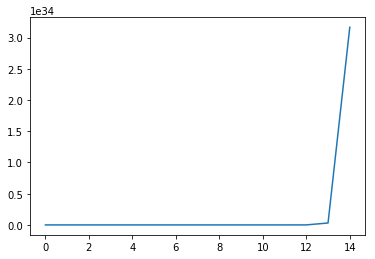

In [24]:
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.show()